<a href="https://colab.research.google.com/github/tiendatngcs/news_topic_classifier/blob/master/01_Data_gathering_News_Topic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pickle as pkl

## Corpus Collecting Demo

In [ ]:
markup = requests.get('https://www.nytimes.com/2020/09/17/us/politics/biden-pennsylvania-town-hall.html').text

<!DOCTYPE html>
<html lang="en" class="story"  xmlns:og="http://opengraphprotocol.org/schema/">
  <head>
    <title data-rh="true">Biden, Facing Voters in a 2020 Rarity, Attacks Trump From a Battleground State - The New York Times</title>
    <meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" property="article:published" content="2020-09-18T02:24:54.000Z"/><meta data-rh="true" property="article:modified" content="2020-09-18T04:02:29.095Z"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" content="100000007346859"/><meta data-rh="true" name="nyt_uri" content="nyt://article/0a8d80c7-5f8e-5181-a879-095911bffe11"/><meta data-rh="true" name="pubp_event_id" content="pubp://event/eecff1c6491b4a58b4f5f9408f73b6dd"/><meta data-rh="true" name="description" content="At a town hall event near Scranton, Pa., the Democratic nominee played up his local roots as h
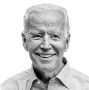
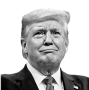

In [ ]:
print(markup)

In [ ]:
def url_to_copus(url: str):
  markup = requests.get(url).text
  soup = BeautifulSoup(markup=markup, features='lxml')
  text = [p.text for p in soup.find()]

In [ ]:
url_to_corpus("https://www.nytimes.com/2020/09/17/world/covid-19-coronavirus.html")

In [16]:
import requests
url = ('http://newsapi.org/v2/top-headlines?'
       'country=us&'
       'category=business&'
       'pageSize=100&'
       'apiKey=6a4952f7c5d54b518715fe2f2c07aeeb')
response = requests.get(url)
print(response.json())



{'status': 'ok', 'totalResults': 70, 'articles': [{'source': {'id': None, 'name': 'CNBC'}, 'author': 'Lora Kolodny', 'title': "Here's the email Elon Musk sent Tesla employees with 10 days left in Q3 - CNBC", 'description': 'Elon Musk to Tesla employees: company has to "rally hard" to achieve record deliveries in third quarter.', 'url': 'https://www.cnbc.com/2020/09/21/read-the-email-elon-musk-sent-tesla-employees-before-q3-2020-ends.html', 'urlToImage': 'https://image.cnbcfm.com/api/v1/image/106032591-1563813200879gettyimages-1157175928.jpeg?v=1598902887', 'publishedAt': '2020-09-21T18:19:00Z', 'content': 'On Sunday evening, Tesla CEO Elon Musk sent an e-mail to all employees at the electric vehicle maker saying the company would have to "rally hard" to hit "record deliveries" for the quarter.\r\nMusk, a… [+2443 chars]'}, {'source': {'id': 'the-wall-street-journal', 'name': 'The Wall Street Journal'}, 'author': 'Amol Sharma, Benjamin Mullin, Cara Lombardo', 'title': 'Quibi Explores Str

In [17]:
response.json()['articles']

[{'author': 'Lora Kolodny',
  'content': 'On Sunday evening, Tesla CEO Elon Musk sent an e-mail to all employees at the electric vehicle maker saying the company would have to "rally hard" to hit "record deliveries" for the quarter.\r\nMusk, a… [+2443 chars]',
  'description': 'Elon Musk to Tesla employees: company has to "rally hard" to achieve record deliveries in third quarter.',
  'publishedAt': '2020-09-21T18:19:00Z',
  'source': {'id': None, 'name': 'CNBC'},
  'title': "Here's the email Elon Musk sent Tesla employees with 10 days left in Q3 - CNBC",
  'url': 'https://www.cnbc.com/2020/09/21/read-the-email-elon-musk-sent-tesla-employees-before-q3-2020-ends.html',
  'urlToImage': 'https://image.cnbcfm.com/api/v1/image/106032591-1563813200879gettyimages-1157175928.jpeg?v=1598902887'},
 {'author': 'Amol Sharma, Benjamin Mullin, Cara Lombardo',
  'content': 'Streaming service Quibi is exploring several strategic options including a possible sale, according to people familiar with the 

In [18]:
categories = ['business', 'entertainment', 'general', 'health', 'science', 'sports', 'technology']

In [23]:
articles = []
label = []
for category in categories:
  print("{}:".format(category), end=' ')
  url = ('http://newsapi.org/v2/top-headlines?'
          'country=us&'
          'category='+category+'&'
          'pageSize=99&'
          'apiKey=6a4952f7c5d54b518715fe2f2c07aeeb')
  response = requests.get(url)
  articles_dict_list = response.json()['articles']
  size = len(articles_dict_list)
  print(size)
  for articles_dict in articles_dict_list:
    if articles_dict['content'] is None or articles_dict['content'] == 'None':
      print("defect link: {}".format(articles_dict['url']))
    else:
      articles.append(articles_dict['content'])
      label.append(category)

business: 70
defect link: https://www.barrons.com/articles/ge-pulls-plug-on-a-shrinking-business-building-coal-power-plants-51600706184
defect link: https://www.cnn.com/2020/09/21/business/bed-bath-beyond-63-stores-closing-2020/index.html
defect link: https://news.google.com/__i/rss/rd/articles/CBMiK2h0dHBzOi8vd3d3LnlvdXR1YmUuY29tL3dhdGNoP3Y9TjRraVgwa1dnQ2_SAQA?oc=5
defect link: https://www.cnn.com/2020/09/21/business/walmart-private-label-clothing/index.html
defect link: https://news.google.com/__i/rss/rd/articles/CBMiK2h0dHBzOi8vd3d3LnlvdXR1YmUuY29tL3dhdGNoP3Y9MnhFZkZoLU13S3fSAQA?oc=5
entertainment: 70
defect link: https://news.google.com/__i/rss/rd/articles/CBMiK2h0dHBzOi8vd3d3LnlvdXR1YmUuY29tL3dhdGNoP3Y9Wl82eWlqR1JCTHfSAQA?oc=5
defect link: https://www.cnn.com/2020/09/21/entertainment/bts-tiny-desk-concert-trnd/index.html
defect link: https://news.google.com/__i/rss/rd/articles/CBMiK2h0dHBzOi8vd3d3LnlvdXR1YmUuY29tL3dhdGNoP3Y9dFh6c1Jyc3NLc0XSAQA?oc=5
defect link: https://news.google

In [25]:
articles[0]

"DUNCAN, S.C. —A North Carolina man was arrested in the Upstate after he was caught looking under a woman's bathroom stall at a Cracker Barrel restaurant, according to Duncan police Chief Carl Long.\r\n… [+2367 chars]"

In [26]:
len(articles)

370

In [29]:
label

['business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertainment',
 'entertain

In [31]:
with open('/content/drive/My Drive/corpus_and_label.pkl', 'wb') as outfile:
  pkl.dump((articles, label), outfile)